<h1>Nigeria Presidential Candidates (2023) Tweets</h1>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.  

It represents the tweets by Nigeria presidential candidates or about them.  

In 2023, there are Presidential elections in Nigeria. Several candidates are already in competition.  

The tweets colected uses several trending hashtags related to Nigerian election, to Nigerian presidential candidates and also tweets by several candidates in the top of electors preferences.


# Data preparation

## Load packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import warnings
warnings.simplefilter("ignore")

## Load data

In [2]:
tweets_df = pd.read_csv("/kaggle/input/nigerian-presidential-election-2023-tweets/nigerian_presidential_election_2023_tweets.csv")

# Data exploration


## Glimpse the data

In [3]:
print(f"data shape: {tweets_df.shape}")

data shape: (90785, 16)


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90785 entries, 0 to 90784
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                90784 non-null  object 
 1   user_name         90780 non-null  object 
 2   user_location     68212 non-null  object 
 3   user_description  82970 non-null  object 
 4   user_created      90772 non-null  object 
 5   user_followers    90772 non-null  object 
 6   user_friends      90772 non-null  object 
 7   user_favourites   90772 non-null  object 
 8   user_verified     90770 non-null  object 
 9   date              90772 non-null  object 
 10  text              90772 non-null  object 
 11  hashtags          48221 non-null  object 
 12  source            90772 non-null  object 
 13  retweets          90767 non-null  object 
 14  favorites         90766 non-null  float64
 15  is_retweet        90766 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [5]:
tweets_df.describe()

,favorites
count,90766.000000
mean,156.237325
std,2529.559751
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,188308.000000


In [6]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244.0,999.0,686.0,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688.0,2827.0,3488.0,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2.0,22.0,40.0,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474.0,1931.0,129947.0,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22.0,198.0,540.0,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False


### Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,1,5,22573,7815,13,13,13,13,15,13,13,42564,13,18,19,19
Percent,0.001102,0.005508,24.86424,8.60825,0.01432,0.01432,0.01432,0.01432,0.016523,0.01432,0.01432,46.884397,0.01432,0.019827,0.020929,0.020929
Types,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object


### Unique values

In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,90784,90780,68212,82970,90772,90772,90772,90772,90770,90772,90772,48221,90772,90767,90766,90766
Uniques,89310,34131,7342,31909,34414,15055,9162,24495,7,85132,88266,16553,206,1410,1542,1


### Most frequent values

In [11]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [12]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,90784,90780,68212,82970,90772,90772,90772,90772,90770,90772,90772,48221,90772,90767,90766,90766
Most frequent item,1646799633878773760,234𝐑𝐚𝐝𝐢𝐨 🌍,Nigeria,Africa’s premium internet radio. \nYour one-st...,2013-07-17 16:30:59+00:00,10993.0,1155.0,8.0,False,2023-04-10 08:45:39+00:00,@jidesanwoolu Go listen up to #OmoEko #LagosBo...,['NigeriaDecides2023'],Twitter for Android,0.0,0.0,False
Frequence,2,3588,10527,3588,3588,529,1007,1911,53927,10,32,11656,46654,45282,46148,90766
Percent from total,0.002,3.952,15.433,4.324,3.953,0.583,1.109,2.105,59.411,0.011,0.035,24.172,51.397,49.888,50.843,100.0


## Visualize the data distribution

In [13]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

Note: only top 20 (by aparition) user names are displayed.

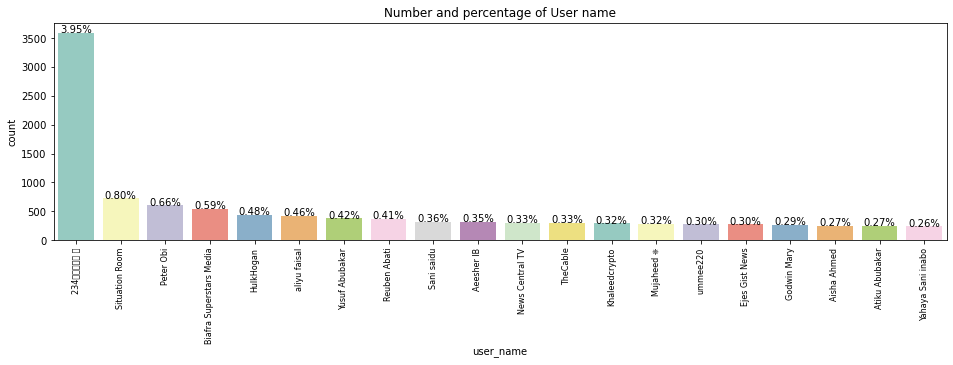

In [14]:
plot_count("user_name", "User name", tweets_df,4)

### User description (top 20)

User description, top 20, by prevalence.

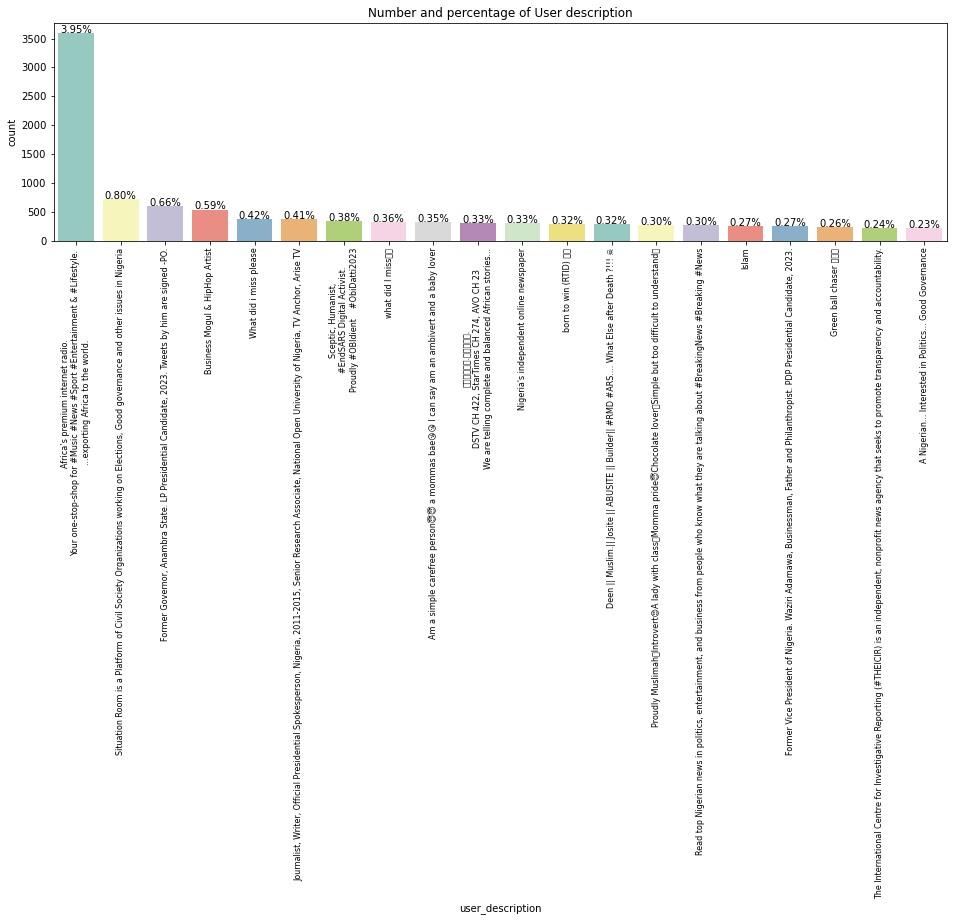

In [15]:
plot_count("user_description", "User description", tweets_df,4)

### Tweet source (top 20)

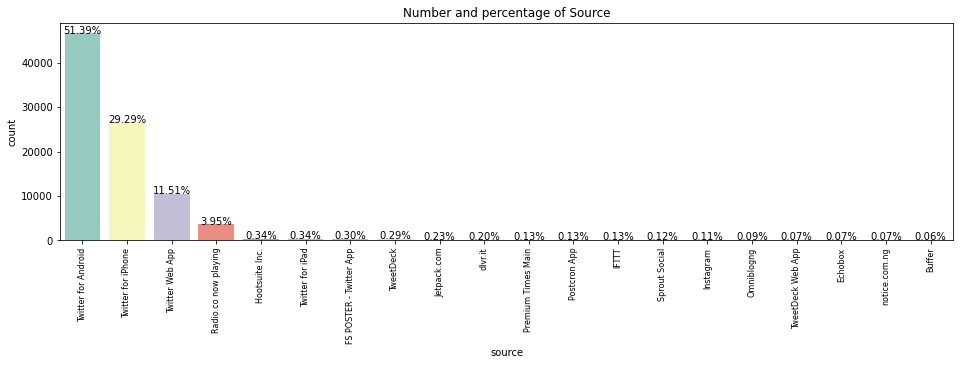

In [16]:
plot_count("source", "Source", tweets_df,4)

### User location

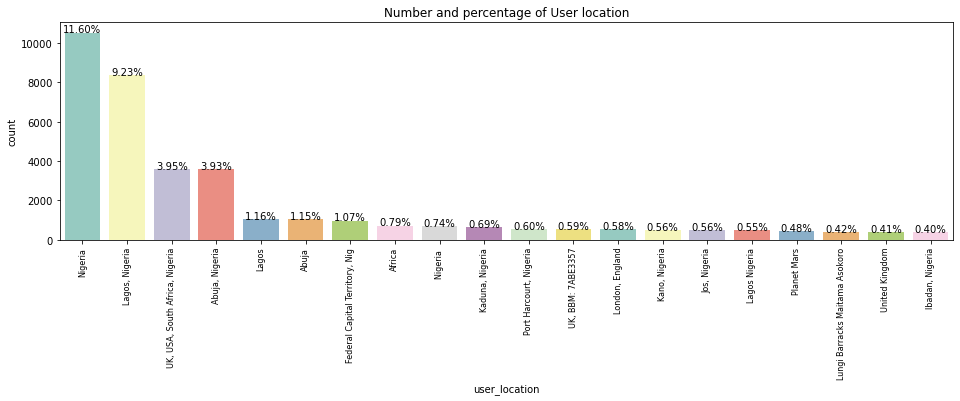

In [17]:
plot_count("user_location", "User location", tweets_df,4)

We observe that the same location appears written in different ways. For example Lagos (capital city of Nigeria) appears written as `Lagos, Nigeria` as well as simply `Lagos`. Also there are generic names, like `UK, USA, Africa, Nigeria` or `Africa` or even funny or irelevant names like `Next Door`. 

In [18]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    
    
    

### Text wordcloauds

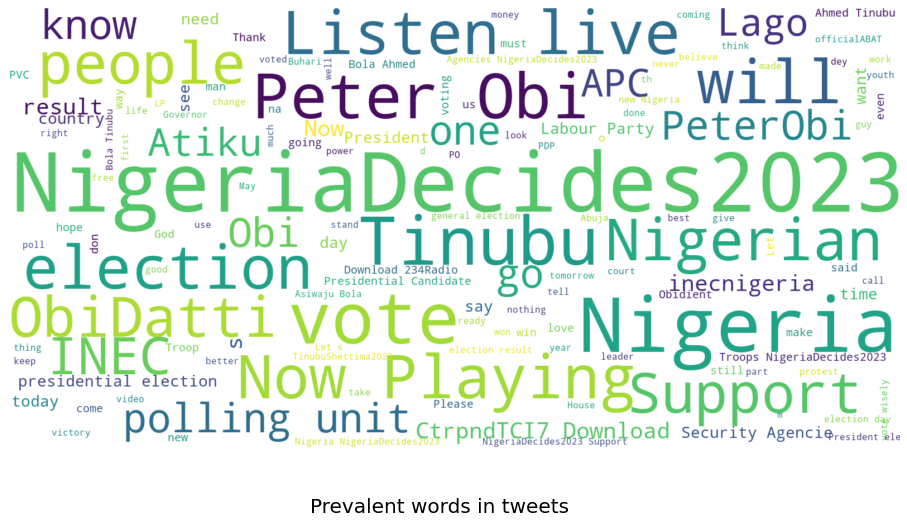

In [19]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

### Locations, as wordcloud

Let's look again to locations, now using the wordcloud.

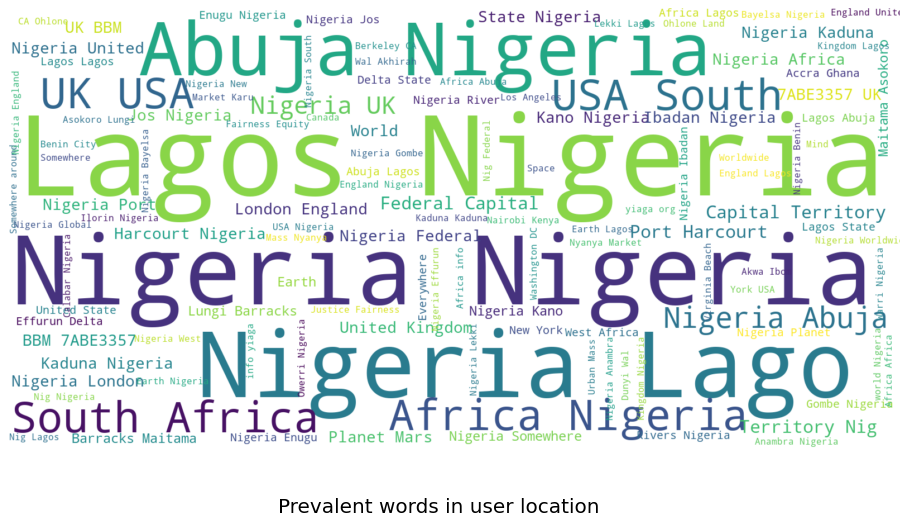

In [20]:
show_wordcloud(tweets_df['user_location'], title = 'Prevalent words in user location')

### User description as wordclouds

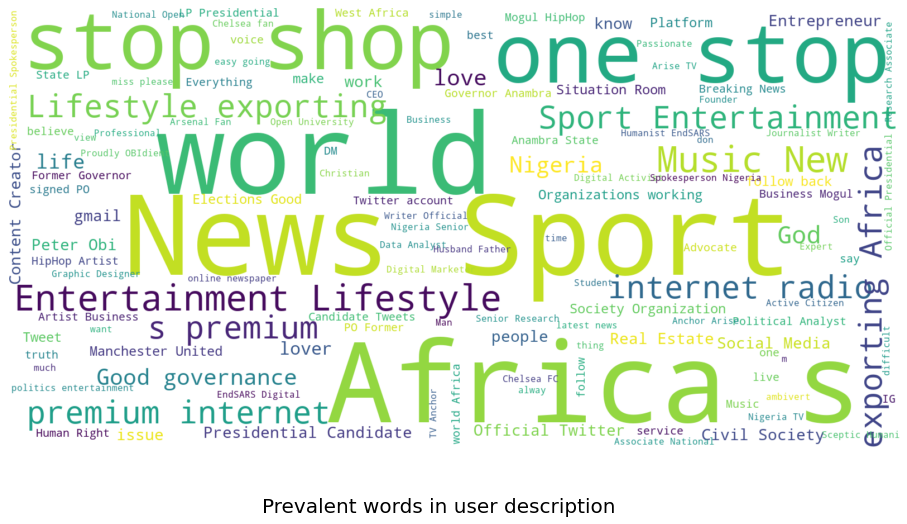

In [21]:
show_wordcloud(tweets_df['user_description'], title = 'Prevalent words in user description')

### Extract date and time features

In [22]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'], errors="coerce")

In [23]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [24]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [25]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

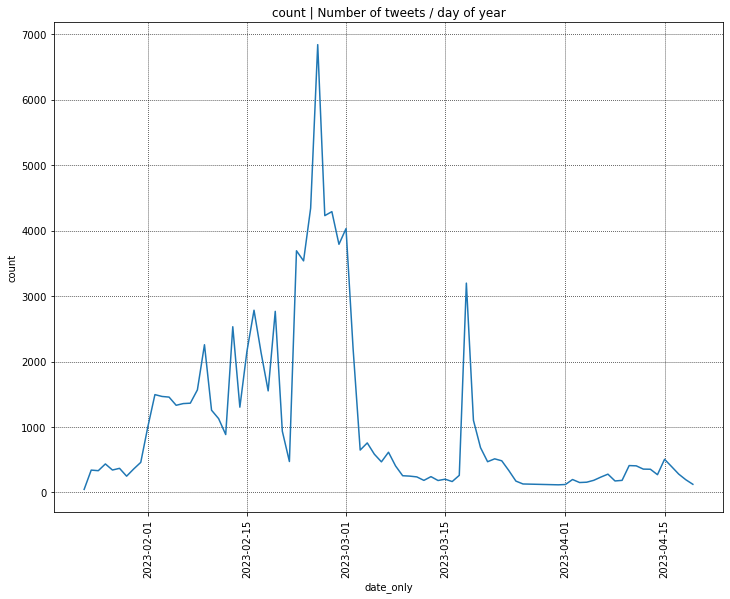

In [26]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

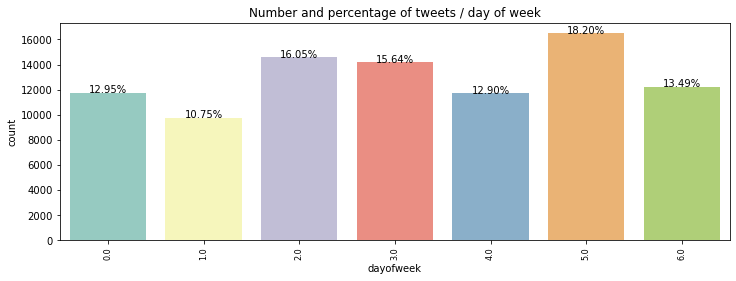

In [27]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

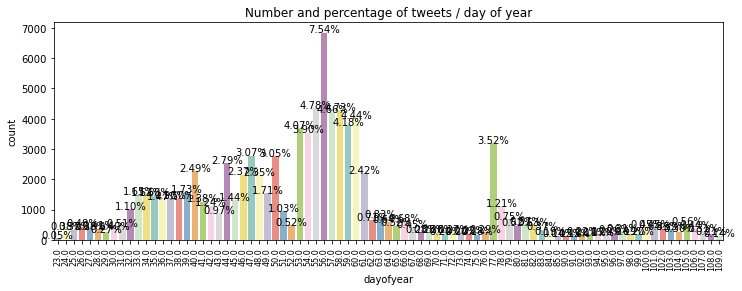

In [28]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

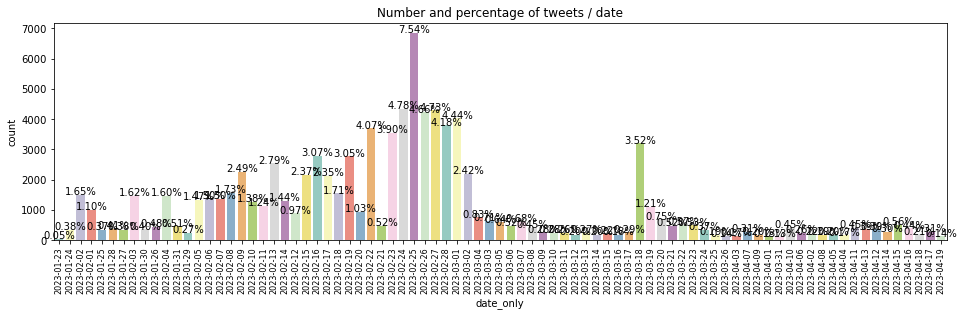

In [29]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

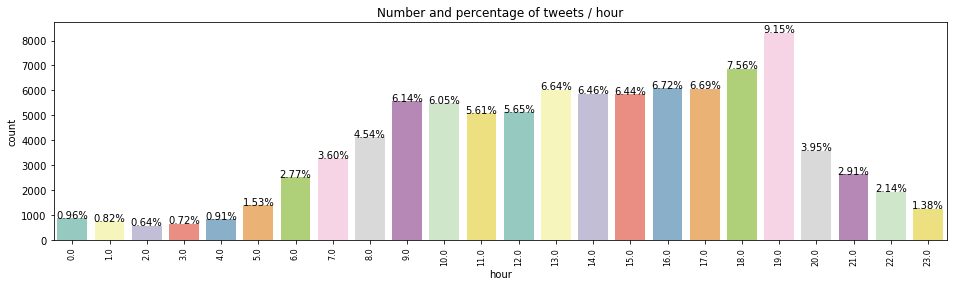

In [30]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

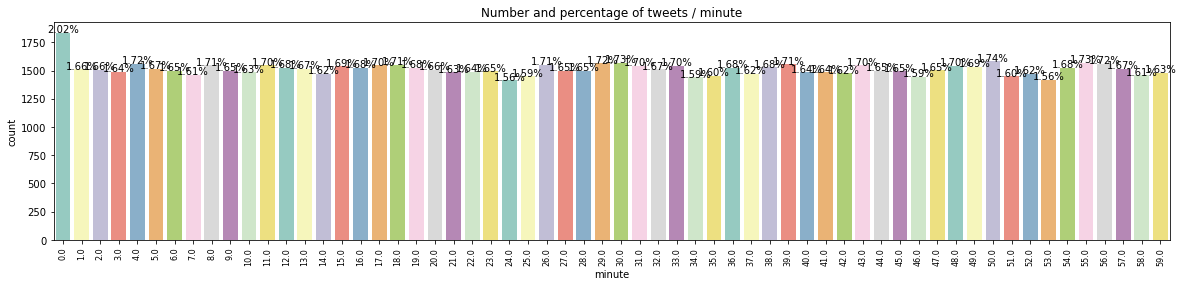

In [31]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

## Sentiment analyis

We use `SentimentIntensityAnalyzer` from `nltk.sentiment` to evaluate the sentiment of the tweets text.

In [32]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [33]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    c = ['green', 'orange', 'red']
    counts.plot(kind='bar', ax=ax1, color=c)
    percent.plot(kind='bar', ax=ax2, color=c)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

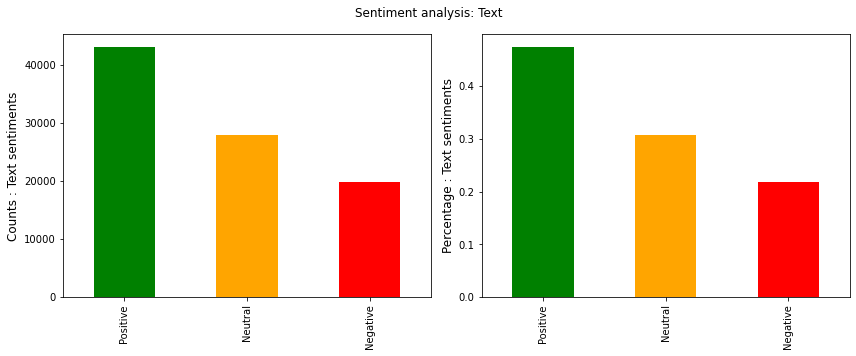

In [34]:
tweets_df['text_sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'text_sentiment', 'Text')

Most of the tweets are evaluated as positive (>50%), next are neutral (>30%) and the rest (<25%) are negative.

### Wordclouds with positive, neutral and negative tweets

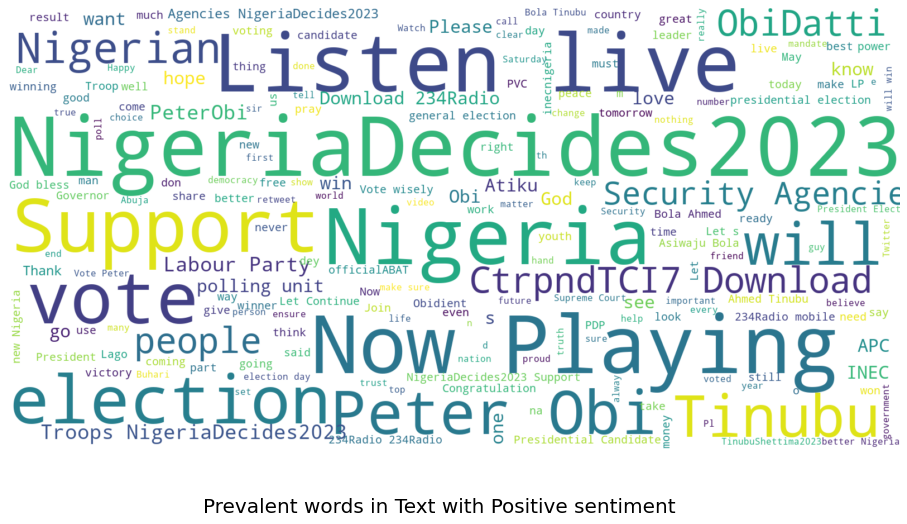

In [35]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Positive", 'text'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

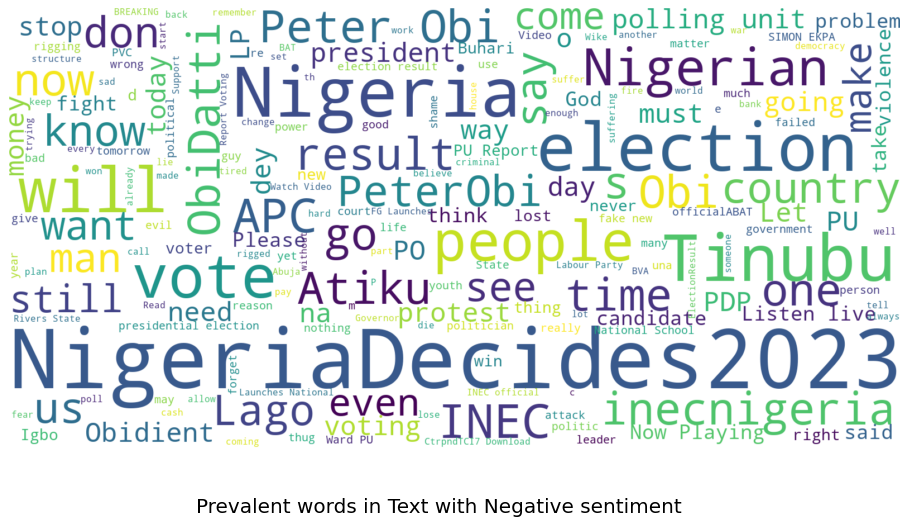

In [36]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Negative", 'text'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

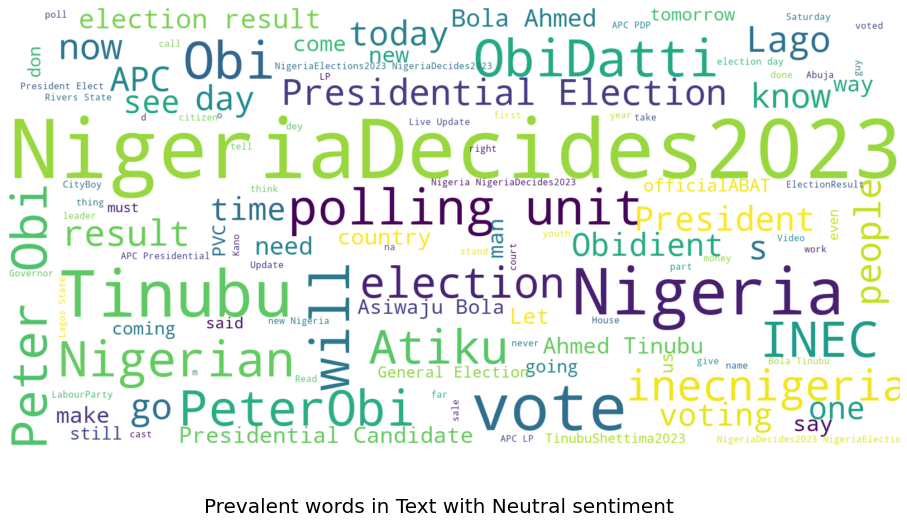

In [37]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Neutral", 'text'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)

### Is there a mostly positive or mostly negative contributor?


Let's group tweets by contributor and sentiment.

In [38]:
agg_tweets_df = tweets_df.groupby(["user_name", "user_description", "user_location", "text_sentiment"])['text'].count().reset_index()

In [39]:
agg_tweets_df.columns = ["user_name", "user_description", "user_location", "text_sentiment", "count"]
agg_tweets_df.sort_values(by=["count"], ascending=False, inplace=True)

#### Top 10 positive tweets (who is tweeting most of positive tweets?)

In [40]:
agg_tweets_df.loc[agg_tweets_df.text_sentiment=="Positive"].head(10)

,user_name,user_description,user_location,text_sentiment,count
527,234𝐑𝐚𝐝𝐢𝐨 🌍,Africa’s premium internet radio. \nYour one-st...,"UK, USA, South Africa, Nigeria",Positive,3319
21079,Peter Obi,"Former Governor, Anambra State. LP Presidentia...",Nigeria,Positive,349
27757,Yusuf Abubakar,What did i miss please,Lungi Barracks Maitama Asokoro,Positive,245
30171,ummee220,Proudly Muslimah🥰Introvert😍A lady with class💕M...,"Kaduna, Nigeria",Positive,200
24193,Stephen Peter,Am cool calm and love people,Abuja,Positive,184
4587,Biafra Superstars Media,Business Mogul & HipHop Artist,"UK, BBM: 7ABE3357",Positive,178
2466,Aisha Ahmed,Islam,"Kano, Nigeria",Positive,172
21865,Queen of the South,Follow I follow back\nlover 💙\nCounselor,"Federal Capital Territory, Nig",Positive,166
2200,Aeesher IB,Am a simple carefree person😇😇 a mommas bae😘😘 I...,Kaduna,Positive,160
30698,‎فيصل,"(F❤️Z and J) If you hear of my death, please p...",Dunyi Wal Akhirah,Positive,142


#### Top 10 negative tweets (who is tweeting most of the negative tweets?)

In [41]:
agg_tweets_df.loc[agg_tweets_df.text_sentiment=="Negative"].head(10)

,user_name,user_description,user_location,text_sentiment,count
23734,Situation Room,Situation Room is a Platform of Civil Society ...,Nigeria,Negative,480
525,234𝐑𝐚𝐝𝐢𝐨 🌍,Africa’s premium internet radio. \nYour one-st...,"UK, USA, South Africa, Nigeria",Negative,264
4585,Biafra Superstars Media,Business Mogul & HipHop Artist,"UK, BBM: 7ABE3357",Negative,238
21077,Peter Obi,"Former Governor, Anambra State. LP Presidentia...",Nigeria,Negative,144
22254,Reuben Abati,"Journalist, Writer, Official Presidential Spok...",Nigeria,Negative,138
11902,HulkHogan,"Sceptic, Humanist,\n#EndSARS Digital Activist....",Planet Mars,Negative,112
8895,Ejes Gist News,"Read top Nigerian news in politics, entertainm...","Effurun, Delta State.",Negative,107
2198,Aeesher IB,Am a simple carefree person😇😇 a mommas bae😘😘 I...,Kaduna,Negative,107
17298,Mujaheed ❈,Deen || Muslim.|| Josite || ABUSITE || Builder...,"Jos, Nigeria",Negative,99
25435,TheCable,Nigeria's independent online newspaper,Nigeria,Negative,84


It is interesting to see that `Peter Obi`, one of the presidential candidates, is in top 2 for positive tweets (with 147) but also in top 5 with negative tweets (with 61).  
234𝐑𝐚𝐝𝐢𝐨 🌍 appears as 1st contributor with positive news and also first contributor with negative tweets. His Positive / Negative ratio is more than 10/1.

Let's see a selection of negative and positive tweets by `Peter Obi`.


##### Selection of positive tweets by `Peter Obi`

Let's select the most liked positive tweets by `Peter Obi`

In [42]:
tweets_df.loc[(tweets_df.text_sentiment=="Positive") & (tweets_df.user_name=="Peter Obi")]["text"].values[0:10]


array(['Thank you Katsina for the warm reception.-PO',
       'My Campaign train landed in Katsina today for more fruitful political engagements with the people. Again, just like… https://t.co/0QPqoQXvb9',
       'I urge you all to go and collect your PVC and vote in this critical election. I am the Labour Party candidate, and… https://t.co/uISVDhKlmd',
       'Again, the massive support we received at Gombe and Borno States today reassured me of the very victory we as Niger… https://t.co/oCpOcGBXvt',
       'May God Almighty continue to protect and bless the good people of Abia State, and our nation Nigeria. -PO',
       'May God Almighty, who called him home grant him eternal rest in His Kingdom, and grant his immediate family, and th… https://t.co/Xm8UhtUel7',
       'I sincerely commiserate with the Abia State Governor, H.E. Okezie Ikpeazu; the PDP Family and the entire people of… https://t.co/70pA8rPOiK',
       "Good morning to the good people of Gombe. I'm looking forward to our

##### Negative tweets by `Peter Obi`

Let's select the most liked negative tweets by `Peter Obi`

In [43]:
tweets_df.loc[(tweets_df.text_sentiment=="Negative") & (tweets_df.user_name=="Peter Obi"), "text"].values[0:10]

array(['I condemn the gruesome killing of Christopher Ohizu, the Ideato North LGA chairman. Things like these ought not to… https://t.co/8dtEuSL0uD',
       "In deference, we have postponed our Labour Party's Presidential Rally in Abia state, earlier scheduled for 31st Jan… https://t.co/l9sUAU8c0e",
       "I was shocked to read the sad news of the death of Prof. Uche Ikonne, the Peoples Democratic Party's Governorship Candidate in Abia State.",
       'We must tackle food insecurity and weak currency to turn the country around; we must cut cost of governance and fig… https://t.co/zvmrtX8aF1',
       'The bulk of SMEs will be driven by youths as a means of tackling youth unemployment.  Our 4th industrial revolution… https://t.co/vh885aIBwm',
       'We will build a society that is premised on the rule of law as we strive to secure and unite Nigeria. Insecurity is… https://t.co/wXKrCmYw6s',
       'This morning, I had a media chat with representatives of CNN, Al Jazeera and Economist ne

## Topic Modeling

For topic modeling we are using first Latent Semantic Analysis.  
For this, we will need to start with preprocessing the tweets.   



In [44]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
tweets_df["clean_text"] = tweets_df["text"].dropna().apply(lambda x: x.replace('https', ''))
tweets_df["clean_text"] = tweets_df["clean_text"].dropna().apply(lambda x: x.replace('http', ''))
tweets_df["clean_text"] = tweets_df["clean_text"].dropna().apply(lambda x: x.replace('amp', ''))
text_sample = tweets_df["clean_text"].dropna().values


print('Headline before vectorization: {}'.format(text_sample[10]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Headline after vectorization: \n{}'.format(document_term_matrix[10]))

Headline before vectorization: Do make your vote 🗳 count!
#AtikuOkowa2023  #AtikuInBayelsa #atiku #bola2023 
@atiku @atiku_amc @PeterObi… ://t.co/AaR8cPnadS
Headline after vectorization: 
  (0, 24333)	1
  (0, 3412)	2
  (0, 3423)	1
  (0, 15504)	1
  (0, 35769)	1
  (0, 6646)	1
  (0, 3443)	1
  (0, 4564)	1


Let's set the number of topics.

In [45]:
number_topics = 10

We are using truncated singular value decomposition for implementing LSA.

In [46]:
lsa_model = TruncatedSVD(n_components=number_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [47]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [48]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [49]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(number_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [50]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  nigeriadecides2023 election support inec nigeria 2023 elections results inecnigeria troops
Topic 2:  234radio live listen playing ctrpndtci7 download ft mobile app 234
Topic 3:  obi tinubu peter atiku nigeria president apc presidential election candidate
Topic 4:  vote obidatti obi peter wisely party lp labour let don
Topic 5:  nigeria new election elections 2023 obidatti vote president people god
Topic 6:  vote apc don tinubu election nigerians people wisely atiku make
Topic 7:  tinubu president bola asiwaju ahmed peterobi officialabat atiku buhari elect
Topic 8:  state apc pdp lagos lp time ward lga unit party
Topic 9:  obidatti people peterobi don just god like dey obidients know
Topic 10:  support security let troops agencies nigeriadecides2023 continue centre 2023 national


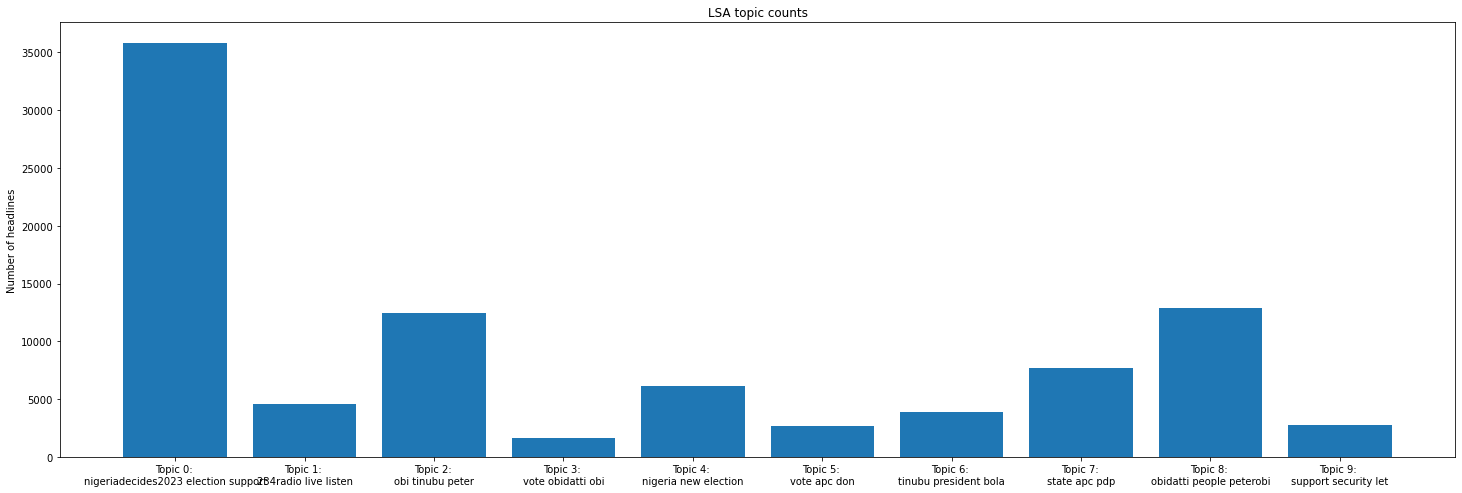

In [51]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(25,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()
